In [72]:
import numpy as np  # linear algebra
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn import linear_model
from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter

from sklearn.metrics import classification_report

import xgboost as xgb

import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [25]:
df.shape

(1470, 35)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [26]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [27]:
cols_name = list(df.columns)
cols_name

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [28]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=1470, step=1)

In [29]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<Axes: >

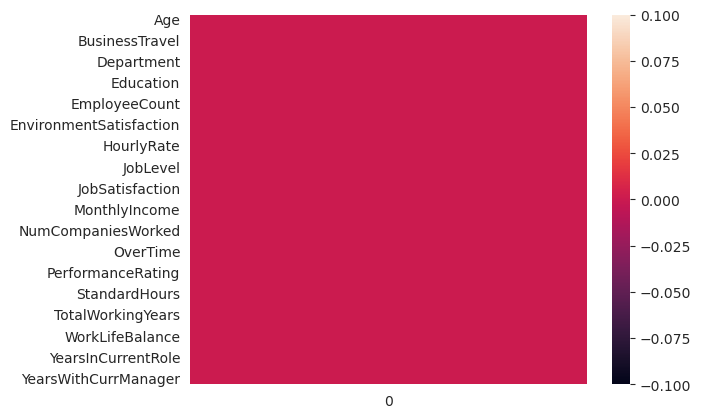

In [30]:
sns.heatmap(df.isnull().sum().to_frame())

In [31]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [32]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


<Axes: >

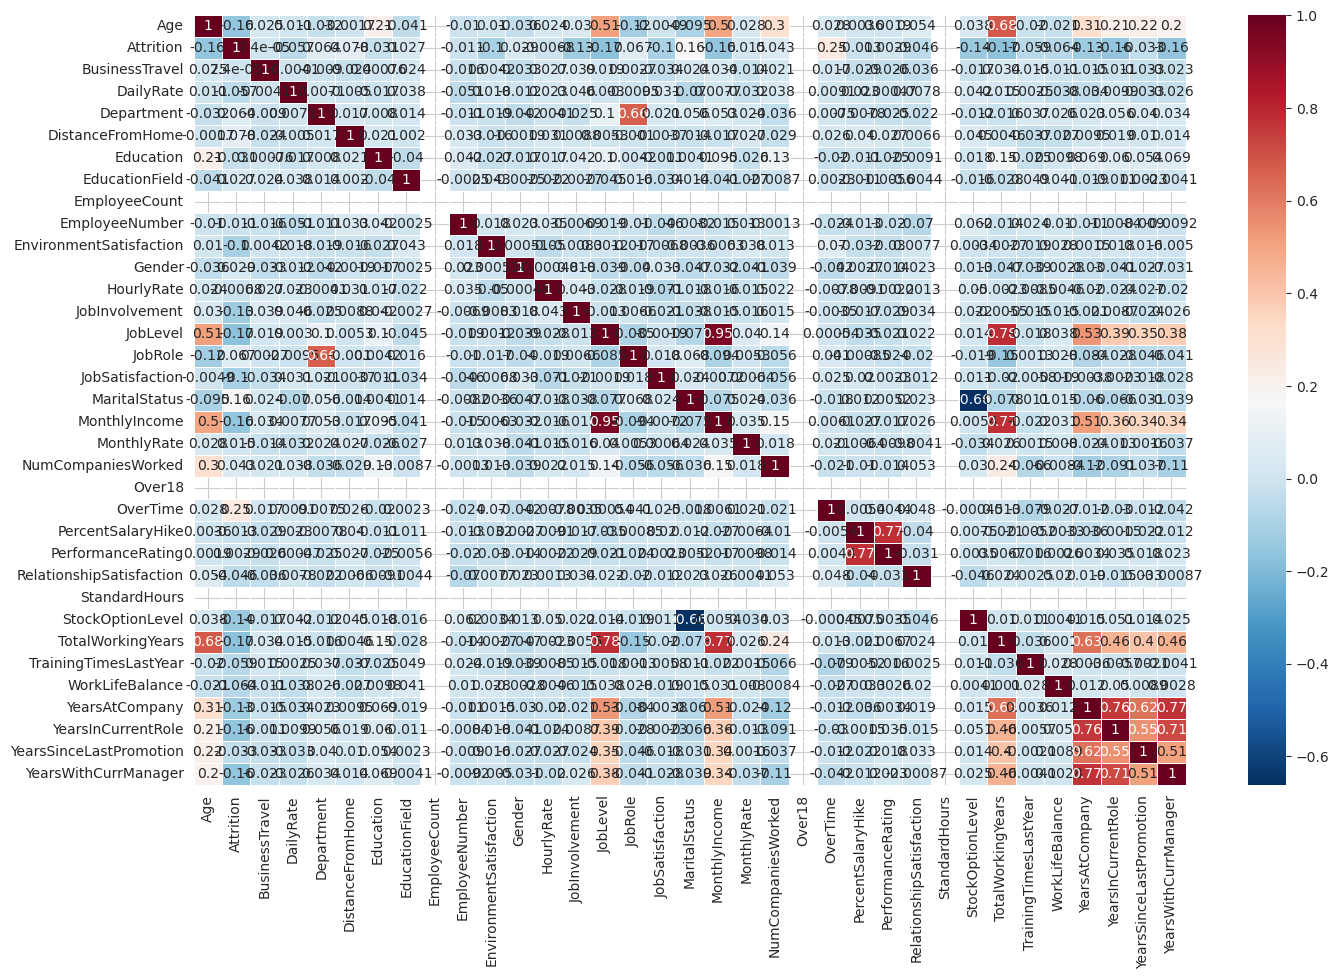

In [38]:
# Use Pearson correlation to find pairwise correlation of all variables

df['Attrition'] = df['Attrition'].astype('category').cat.codes
df['BusinessTravel'] = df['BusinessTravel'].astype('category').cat.codes
df['Department'] = df['Department'].astype('category').cat.codes
df['EducationField'] = df['EducationField'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes
df['JobRole'] = df['JobRole'].astype('category').cat.codes
df['MaritalStatus'] = df['MaritalStatus'].astype('category').cat.codes
df['Over18'] = df['Over18'].astype('category').cat.codes
df['OverTime'] = df['OverTime'].astype('category').cat.codes

pearson = df.corr(method='pearson')
pearson
plt.figure(figsize=(16, 10))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Text(0.5, 1.0, 'Number of Attritions Reported by Education Field')

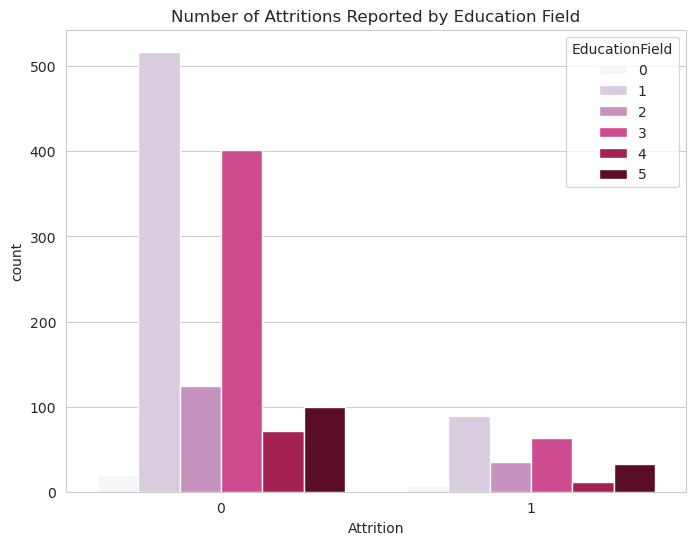

In [39]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='EducationField',data=df, palette = 'PuRd').set_title("Number of Attritions Reported by Education Field")

In [40]:
df[(df["Attrition"] == 1)].groupby(["EducationField"]).size() / df.groupby(["EducationField"]).size()

EducationField
0    0.259259
1    0.146865
2    0.220126
3    0.135776
4    0.134146
5    0.242424
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Job Roles')

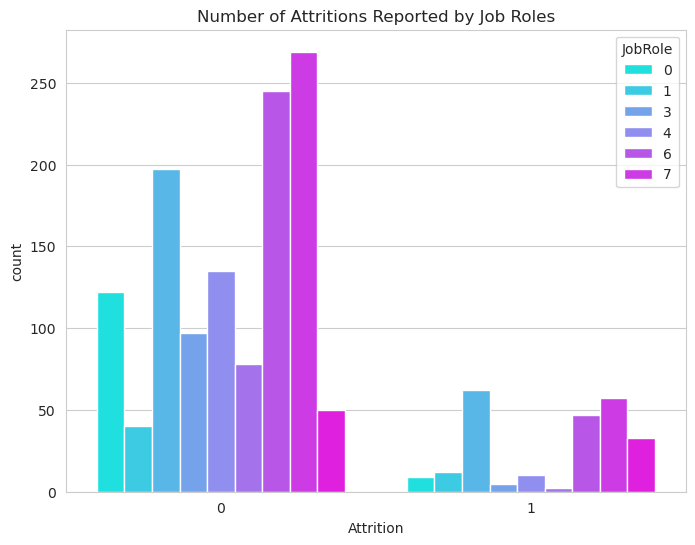

In [41]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='JobRole',data=df, palette = 'cool').set_title("Number of Attritions Reported by Job Roles")

In [42]:
df[(df["Attrition"] == 1)].groupby(["OverTime"]).size() / df.groupby(["OverTime"]).size()

OverTime
0    0.104364
1    0.305288
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Amount of Business Travel')

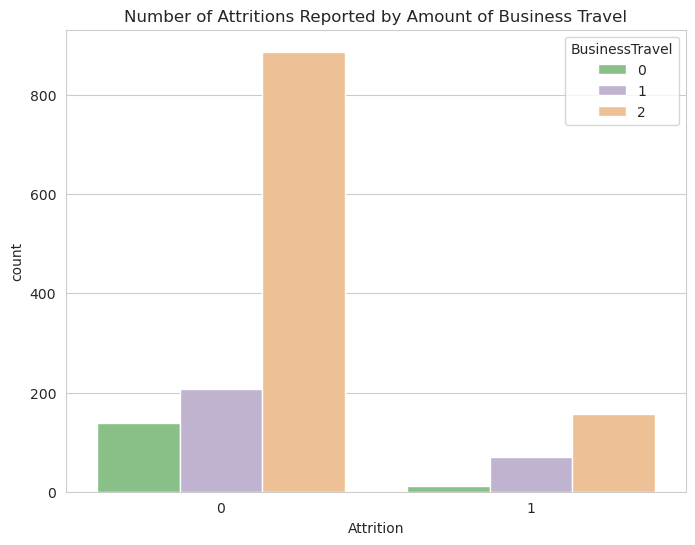

In [43]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='BusinessTravel',data=df, palette = 'Accent').set_title("Number of Attritions Reported by Amount of Business Travel")

In [44]:
df[(df["Attrition"] == 1)].groupby(["BusinessTravel"]).size() / df.groupby(["BusinessTravel"]).size()

BusinessTravel
0    0.080000
1    0.249097
2    0.149569
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Gender')

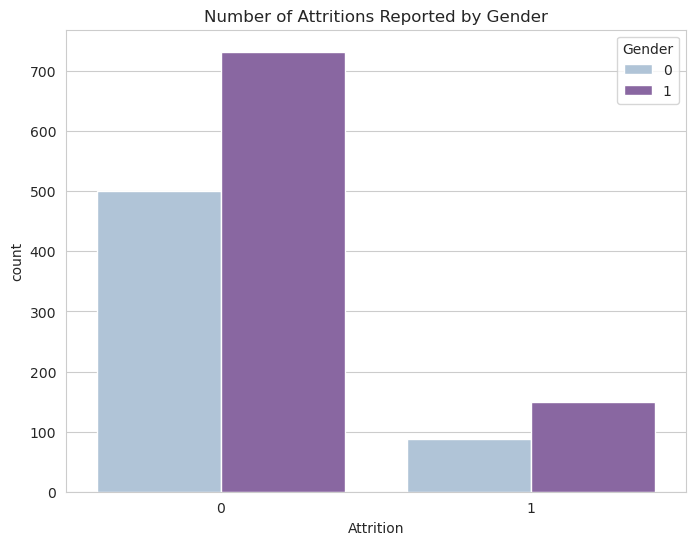

In [45]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='Gender',data=df, palette = 'BuPu').set_title("Number of Attritions Reported by Gender")

In [46]:
df[(df["Attrition"] == 1)].groupby(["Gender"]).size() / df.groupby(["Gender"]).size()

Gender
0    0.147959
1    0.170068
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Marital Status')

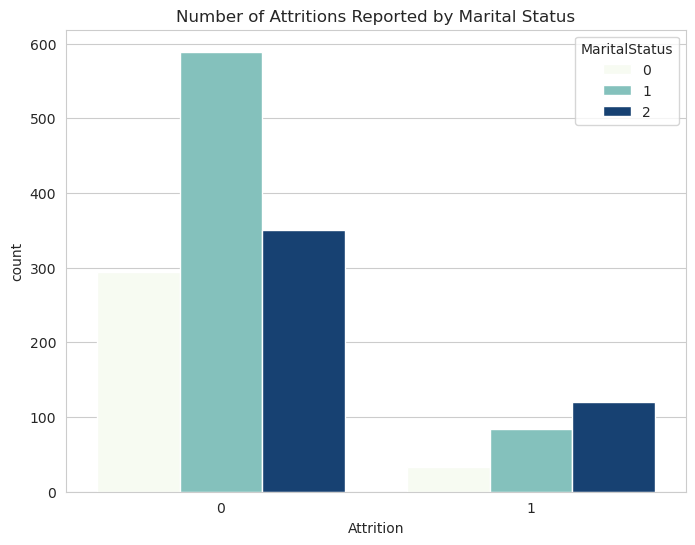

In [47]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='MaritalStatus',data=df, palette = 'GnBu').set_title("Number of Attritions Reported by Marital Status")

In [48]:
df[(df["Attrition"] == 1)].groupby(["MaritalStatus"]).size() / df.groupby(["MaritalStatus"]).size()

MaritalStatus
0    0.100917
1    0.124814
2    0.255319
dtype: float64

In [49]:
df[(df["Attrition"] == 1)].groupby(["JobRole"]).size() / df.groupby(["JobRole"]).size()

JobRole
0    0.068702
1    0.230769
2    0.239382
3    0.049020
4    0.068966
5    0.025000
6    0.160959
7    0.174847
8    0.397590
dtype: float64

# Data Preparation and Modeling

In [75]:
#1. Data Preparation

In [55]:
# We define our own function to target encode all the categorical variables, replacing them with associated mean relation to fraud_reported. 
# This is because most models only take numerical variables.

def numericizer(df, col, new_df_name):
  new_df_name = df[[col,'Attrition']].groupby([col],as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
  df[col] = df[col].replace(new_df_name[col].values, 1 - new_df_name['Attrition'].values)
  new_df_name = None

In [62]:
# Changing binary representation of Gender, Overtime variables to 1/0
df2.Gender = df.Gender.map({'Male':1, 'Female':0})
df2.OverTime = df.OverTime.map({'Yes':1, 'No':0})

<Axes: >

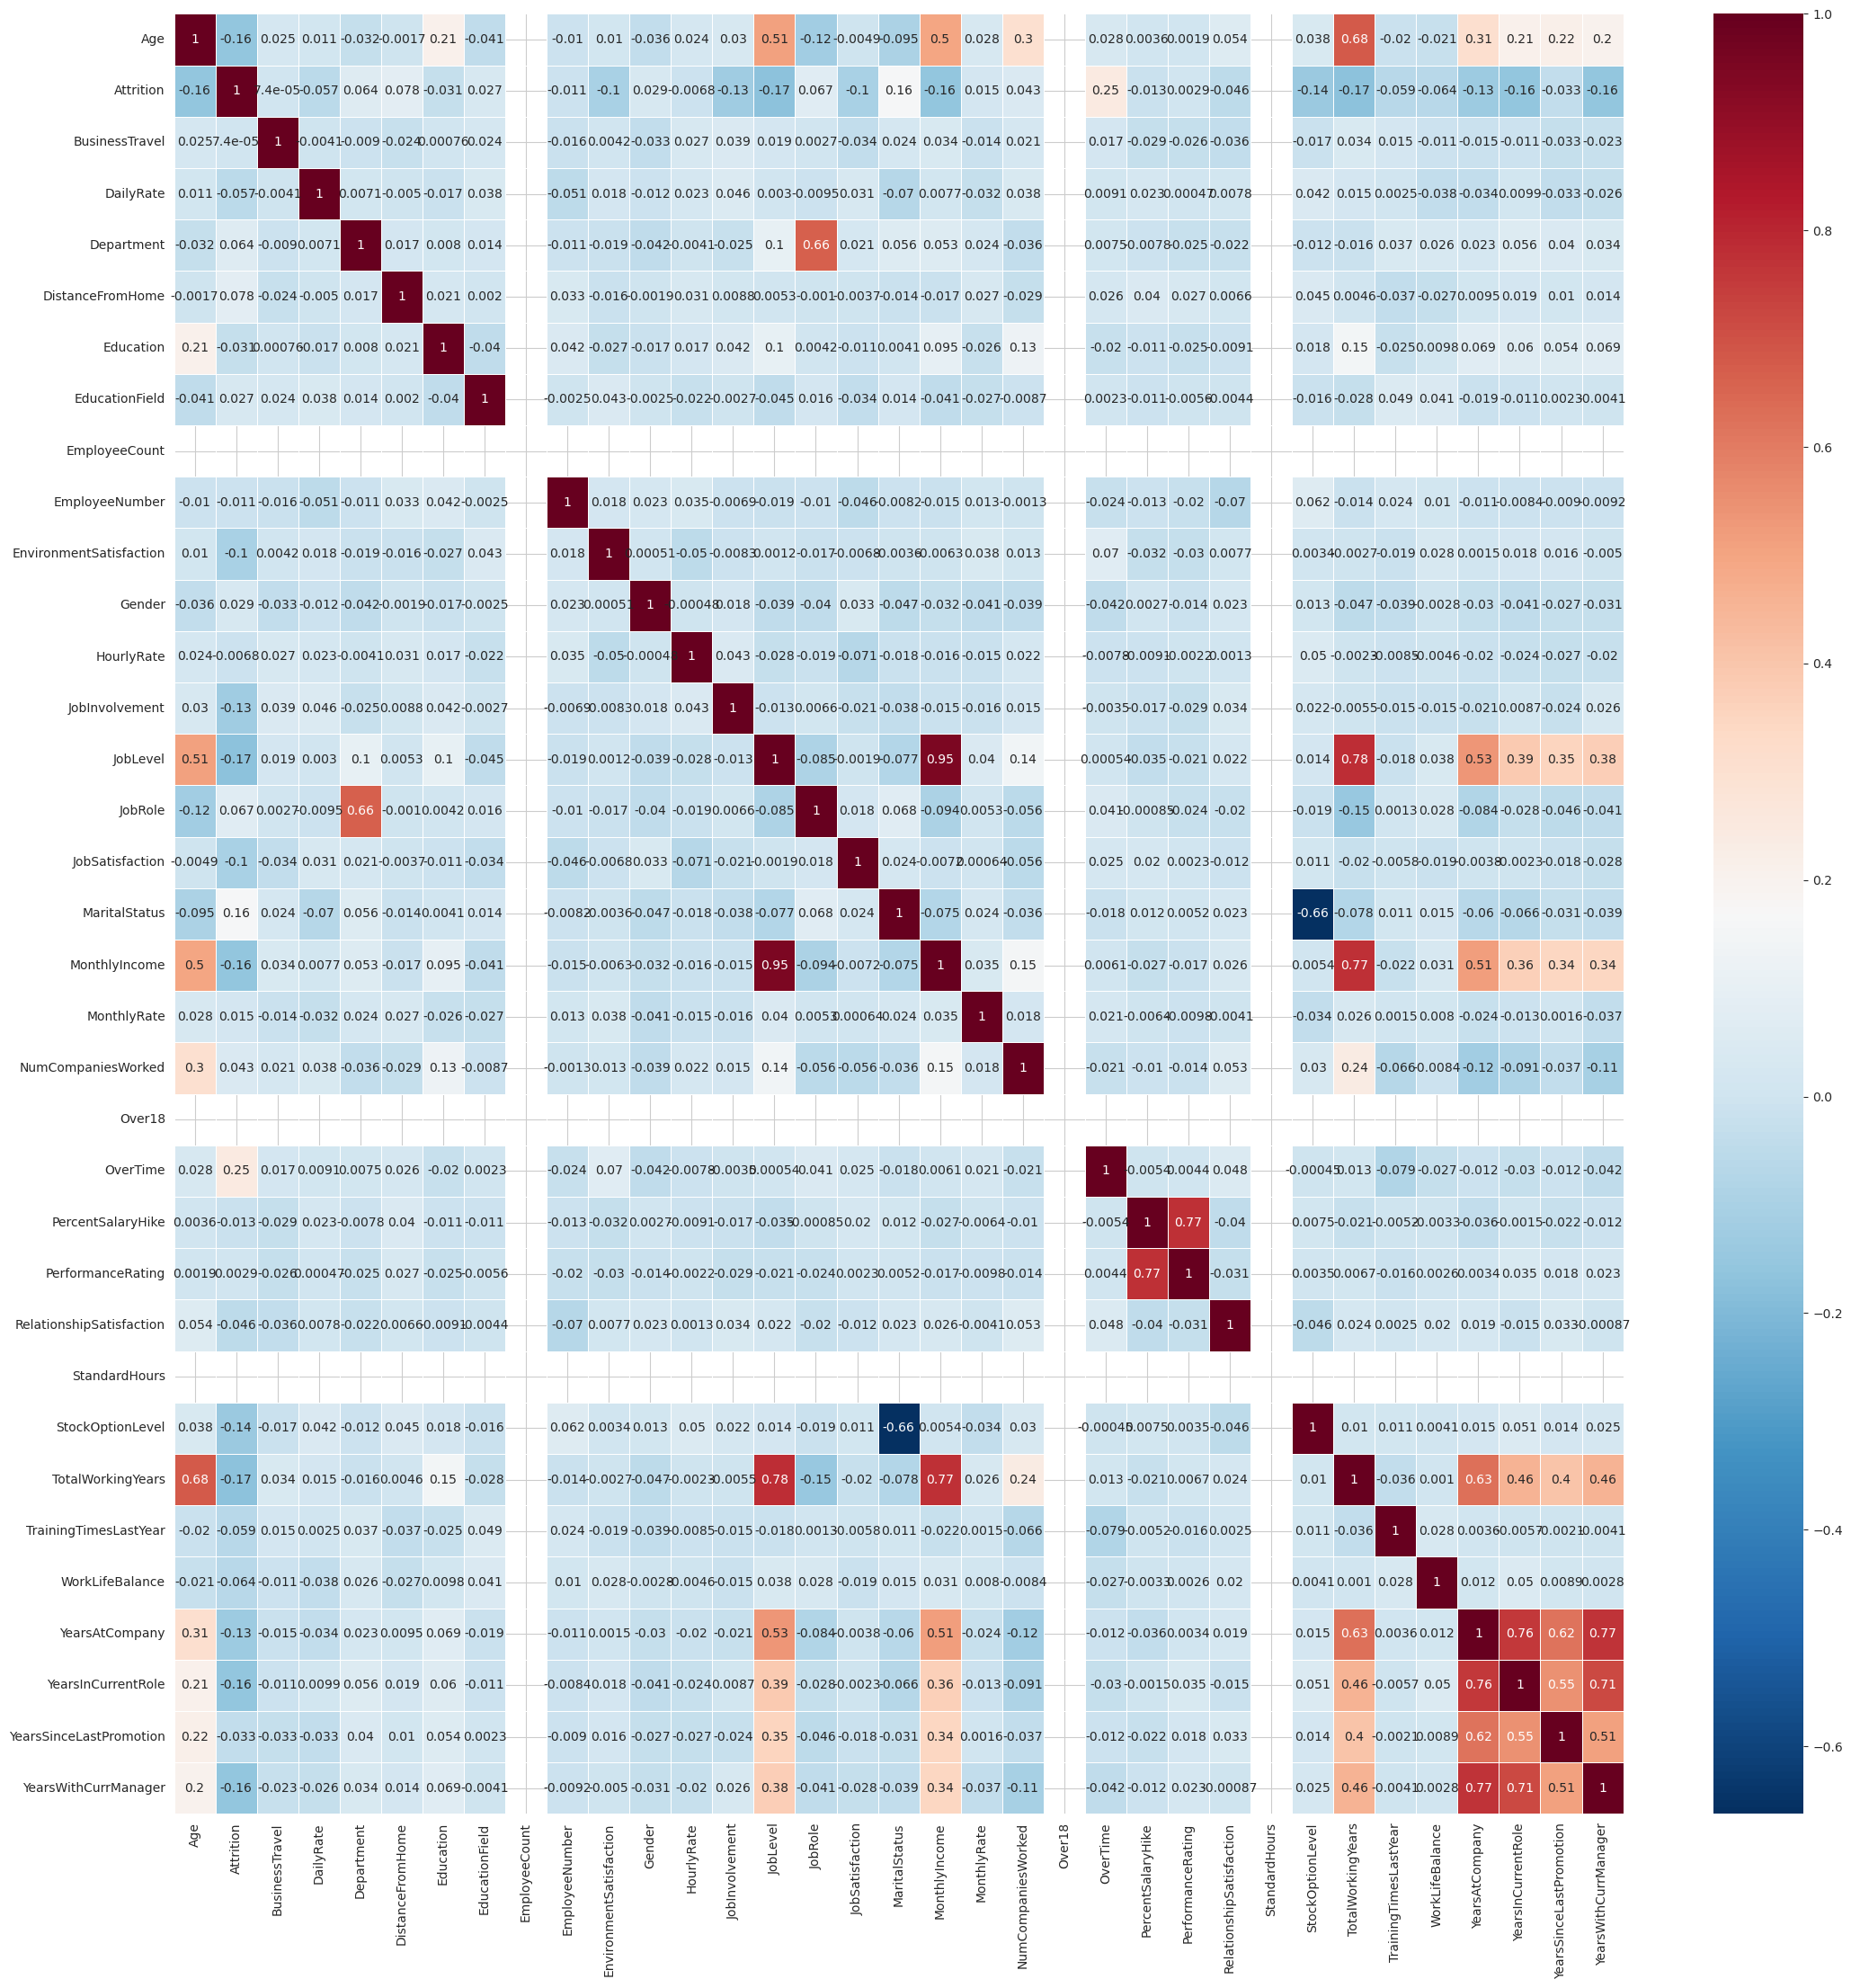

In [64]:
# After we changed all the categorical variables to numerical using mean encoding, 
# we can run pairwise correlation again to see the correlation between all the variables

df['EducationField'] = df['EducationField'].astype('category').cat.codes

pearson = df.corr(method='pearson')
pearson
plt.figure(figsize=(26, 26))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [76]:
#2. Feature Selection

In [67]:
# Picking the features that have absolute correlation value greater than 0.1 
df3 = df[['Attrition', 'Age', 'BusinessTravel', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [77]:
#3. Modeling

In [68]:
# Separating dataset into x & y, where y is the target variable
x = df3.drop('Attrition', axis = 1)
y = df3['Attrition']
# Train test split using industry standard 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1176, 16) (1176,)
Test set: (294, 16) (294,)


In [69]:
# Building logisticregression model to fit training model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1.0, solver='newton-cg', max_iter=800, random_state=86).fit(x_train,y_train)
LR

LogisticRegression(max_iter=800, random_state=86, solver='newton-cg')

In [70]:
# Using training model to predict
yhat_train = LR.predict(x_train)
yhat_test = LR.predict(x_test)

In [78]:
#4. Model Accuracy

In [73]:
# Scoring the training model
print (classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       988
           1       0.71      0.24      0.36       188

    accuracy                           0.86      1176
   macro avg       0.79      0.61      0.64      1176
weighted avg       0.85      0.86      0.83      1176



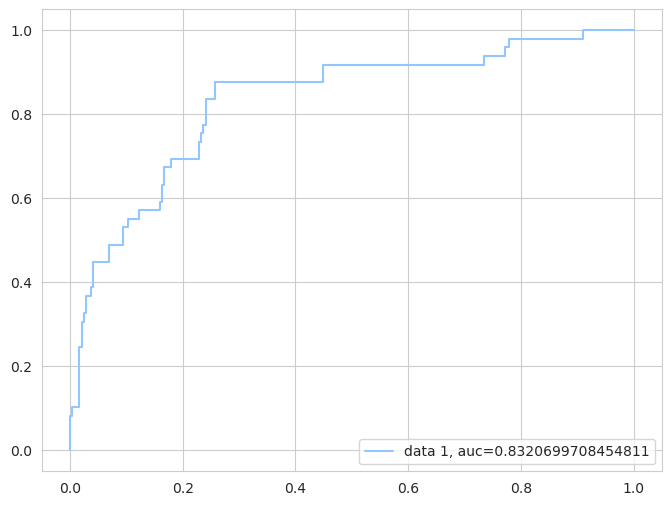

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = LR.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Observations

Based on the data analysis early in the project, we found that there are some numerical variables that are correlated with Attrition: 
    EnvironmentSatisfaction, 
    JobInvolvement, 
    Job level, 
    JobSatisfaction, 
    MonthlyIncome, 
    StockOptionalLevel, 
    TotalWorkingYears, 
    YearsAtCompany, 
    YearsInCurrentRole, 
    YearswithManager.

However, there are some other categorical variables that are also important. For example, we found that in the dataset,

* employees with a background in technical degrees, human resources, and marketing fields have a higher tendency in attrition compared to medical, life sciences and other fields.

* 30 of overtime employees have attrited compared to employees that don\'t work overtime. Frequent Business Travels also contribute to attrition.

* In terms of Job Role, almost 40% of attrited employees are sales representatives, followed by laboratory technicians and human resources positions.

* Stock Option level is also a big factor that contributes to attrition. i.e. if the company offers more stock options for the employees, they are less likely to attrit.

* The analysis also shows that the higher the employee is involved in their jobs, the less likely they are to leave the company.